# 1. Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
df = pd.read_pickle(r'C:\Users\Charles Yi\A6\02 Data\Prepared\df_cleaned.pkl')

# 2. Checking Data Integrity

In [4]:
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990


In [5]:
df.isnull().sum()

Country Name                          0
Regional Indicator                    0
Year                                  0
Life Ladder                           0
Log GDP Per Capita                    5
Social Support                        0
Healthy Life Expectancy At Birth     39
Freedom To Make Life Choices          0
Generosity                            5
Perceptions Of Corruption            50
Positive Affect                       1
Negative Affect                       1
Confidence In National Government    98
dtype: int64

In [6]:
df.shape

(1487, 13)

# 3. Identifying Variables to Test

## 3a. Corr Matrix

C:\Users\Charles Yi\AppData\Local\Temp\ipykernel_30580\1980641772.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happiness_corr = sns.heatmap(df.corr(), annot = True, ax = ax, cmap = cmap)


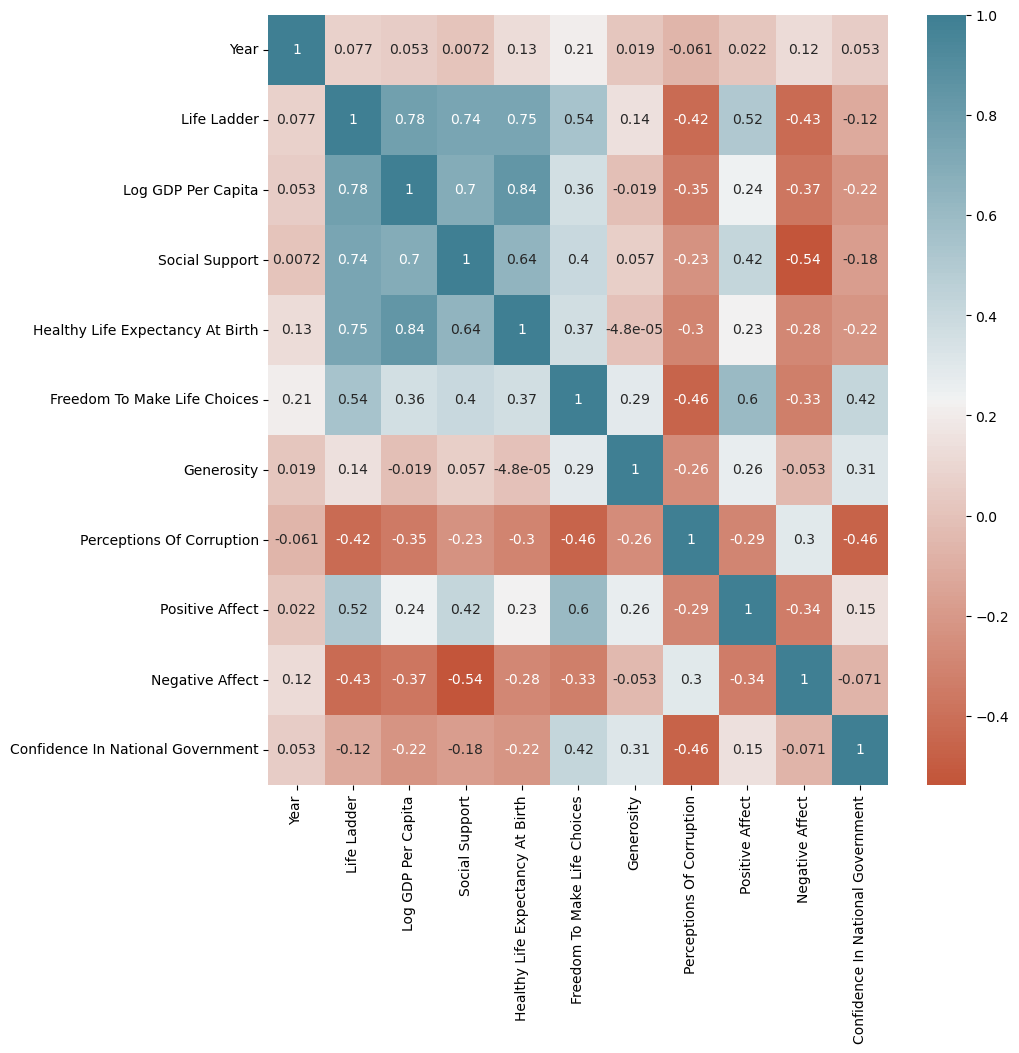

In [7]:
# creating subplot 
f, ax = plt.subplots(figsize = (10, 10))

# defining color
cmap = sns.diverging_palette(20, 220, n=200)

# creating matrix
happiness_corr = sns.heatmap(df.corr(), annot = True, ax = ax, cmap = cmap)

Will create linear regression to examine relationship between Life Ladder and Log GDP Per Capita

## 3b. Creating Scatterplot

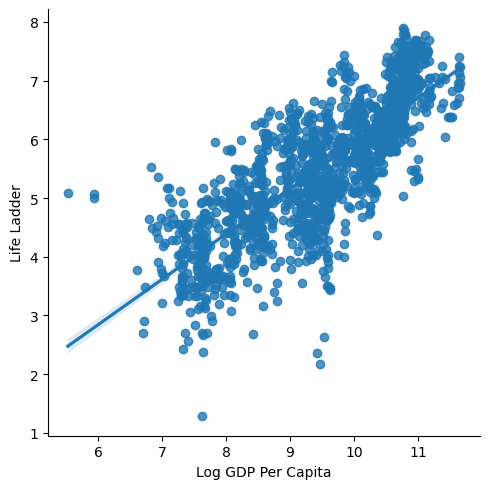

In [8]:
sns.lmplot(data = df, x = 'Log GDP Per Capita', y = 'Life Ladder')

# 4. Preparing Data for Linear Regression

In [9]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['Log GDP Per Capita'].values.reshape(-1,1)
y = df['Life Ladder'].values.reshape(-1,1)

In [10]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression Analysis

In [11]:
# Creating a regression object.

regression = LinearRegression()

In [12]:
# Fitting regression object onto training data set

regression.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
# dropping na in Log GDP Per Capita

df.dropna(subset = ['Log GDP Per Capita'], inplace = True)

In [15]:
# checking result

df.isnull().sum()

Country Name                          0
Regional Indicator                    0
Year                                  0
Life Ladder                           0
Log GDP Per Capita                    0
Social Support                        0
Healthy Life Expectancy At Birth     38
Freedom To Make Life Choices          0
Generosity                            0
Perceptions Of Corruption            50
Positive Affect                       1
Negative Affect                       1
Confidence In National Government    98
dtype: int64

In [16]:
# checking shape

df.shape

# five rows deleted

(1482, 13)

In [22]:
# reshaping variables

X = df['Log GDP Per Capita'].values.reshape(-1, 1)

y = df['Life Ladder'].values.reshape(-1, 1)

In [23]:
# recreating training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# refitting regression object onto training data

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# predicting y with X

predict_y = regression.predict(X_test)

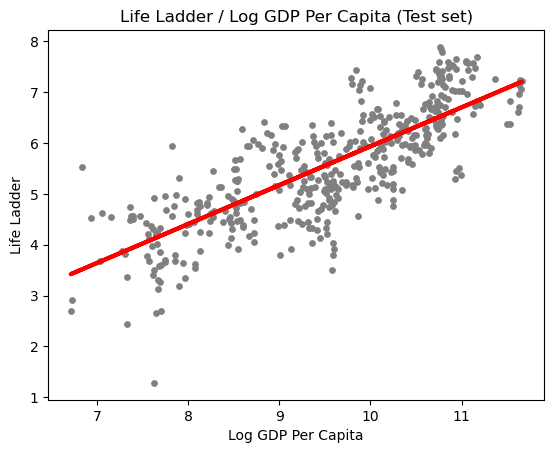

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, predict_y, color='red', linewidth =3)
plot_test.title('Life Ladder / Log GDP Per Capita (Test set)')
plot_test.xlabel('Log GDP Per Capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, predict_y) # This is the mean squared error
r2 = r2_score(y_test, predict_y) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.7641585]]
Mean squared error:  0.45680378514913383
R2 score:  0.6405598461655052


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predict_y.flatten()})
data.head(30)

,Actual,Predicted
0,4.342079,4.863285
1,5.801380,5.542523
2,5.708887,5.310661
3,6.178010,6.422024
4,4.179177,4.914852
5,3.918073,5.631299
6,6.009953,5.621256
7,1.281271,4.115367
8,7.414868,6.536175
9,5.493978,6.054780


In [33]:
# comparing how regression fits the training set

y_predicted_train = regression.predict(X_train)

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.7641585]]
Mean squared error:  0.5091406644903973
R2 score:  0.6034742708095321


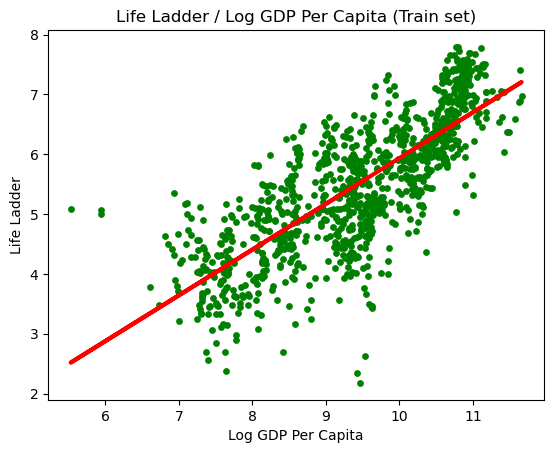

In [36]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Life Ladder / Log GDP Per Capita (Train set)')
plot_test.xlabel('Log GDP Per Capita')
plot_test.ylabel('Life Ladder')
plot_test.show()

In [37]:
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,5.139579,5.595757
1,5.084923,5.126960
2,5.771037,6.100781
3,6.467005,6.532552
4,7.498071,6.594405
5,5.251530,5.635554
6,5.070751,2.835865
7,7.118364,6.613058
8,4.277191,5.382551
9,3.159802,4.098897


**Observation:** Interestingly, r2 score is lower in the train scatterplot, but rmse is higher in the training scatterplot compared to the test scatterplot. In other words, the regression fits poorer onto the training data than the test data. There definitely isn't an issue with overfitting; overall, however, r2 score isn't too impressive with either data sets. 